In [5]:
!pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\kusha\Documents\pythonlearning\venv\Scripts\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!gdown 1SR-03ghw0YIfOp65nZTQTHm72zZyYUGx

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!unzip -q negative.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
# Import standard dependencies
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# Import tensorflow dependencies - Functional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [16]:
# Setup paths
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [7]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'data\\positive'

In [ ]:
import os

# Define the source and destination paths
SRC_PATH = 'negative'
NEG_PATH = 'data/negative'

# Ensure the destination directory exists
os.makedirs(NEG_PATH, exist_ok=True)

# Loop through all files in the source path and move them
for file in os.listdir(SRC_PATH):
    ex_path = os.path.join(SRC_PATH, file)
    if os.path.isfile(ex_path):  # Check if it is a file
        new_path = os.path.join(NEG_PATH, file)
        print(f"Moving file from {ex_path} to {new_path}")
        os.replace(ex_path, new_path)

print("All images have been moved to the 'data/negative' directory.")


Moving file from negative\Aaron_Eckhart_0001.jpg to data/negative\Aaron_Eckhart_0001.jpg
Moving file from negative\Aaron_Guiel_0001.jpg to data/negative\Aaron_Guiel_0001.jpg
Moving file from negative\Aaron_Patterson_0001.jpg to data/negative\Aaron_Patterson_0001.jpg
Moving file from negative\Aaron_Peirsol_0001.jpg to data/negative\Aaron_Peirsol_0001.jpg
Moving file from negative\Aaron_Peirsol_0002.jpg to data/negative\Aaron_Peirsol_0002.jpg
Moving file from negative\Aaron_Peirsol_0003.jpg to data/negative\Aaron_Peirsol_0003.jpg
Moving file from negative\Aaron_Peirsol_0004.jpg to data/negative\Aaron_Peirsol_0004.jpg
Moving file from negative\Aaron_Pena_0001.jpg to data/negative\Aaron_Pena_0001.jpg
Moving file from negative\Aaron_Sorkin_0001.jpg to data/negative\Aaron_Sorkin_0001.jpg
Moving file from negative\Aaron_Sorkin_0002.jpg to data/negative\Aaron_Sorkin_0002.jpg
Moving file from negative\Aaron_Tippin_0001.jpg to data/negative\Aaron_Tippin_0001.jpg
Moving file from negative\Abbas_K

In [6]:
# Import uuid library to generate unique image names
import uuid

In [13]:
os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))

'data\\anchor\\0931f11b-4f41-11ef-b7f4-fa294785e937.jpg'

In [14]:
# Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened(): 
    ret, frame = cap.read()
   
    # Cut down frame to 250x250px
    frame = frame[120:120+250,200:200+250, :]
    
    # Collect anchors 
    if cv2.waitKey(1) & 0XFF == ord('a'):
        # Create the unique file path 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out anchor image
        cv2.imwrite(imgname, frame)
    
    # Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        # Create the unique file path 
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        # Write out positive image
        cv2.imwrite(imgname, frame)
    
    # Show image back to screen
    cv2.imshow('Image Collection', frame)
    
    # Breaking gracefully
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
        
# Release the webcam
cap.release()
# Close the image show frame
cv2.destroyAllWindows()

In [ ]:
cv2.waitKey??

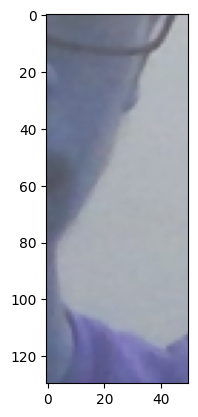

In [10]:
plt.imshow(frame[120:120+250,200:200+250, :])

In [13]:
def data_aug(img):
    data = []
    for i in range(9):
        img = tf.image.stateless_random_brightness(img, max_delta=0.02, seed=(1,2))
        img = tf.image.stateless_random_contrast(img, lower=0.6, upper=1, seed=(1,3))
        # img = tf.image.stateless_random_crop(img, size=(20,20,3), seed=(1,2))
        img = tf.image.stateless_random_flip_left_right(img, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_jpeg_quality(img, min_jpeg_quality=90, max_jpeg_quality=100, seed=(np.random.randint(100),np.random.randint(100)))
        img = tf.image.stateless_random_saturation(img, lower=0.9,upper=1, seed=(np.random.randint(100),np.random.randint(100)))

        data.append(img)

    return data

In [14]:
import os
import uuid

In [17]:
img_path = os.path.join(ANC_PATH, 'ad7a3dc7-4f42-11ef-b4d2-fa294785e937.jpg')
img = cv2.imread(img_path)
augmented_images = data_aug(img)

for image in augmented_images:
    cv2.imwrite(os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

In [18]:
for file_name in os.listdir(os.path.join(POS_PATH)):
    img_path = os.path.join(POS_PATH, file_name)
    img = cv2.imread(img_path)
    augmented_images = data_aug(img)

    for image in augmented_images:
        cv2.imwrite(os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1())), image.numpy())

KeyboardInterrupt: 

In [19]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'/*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'/*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'/*.jpg').take(300)

In [20]:
dir_test = anchor.as_numpy_iterator()

In [21]:
print(dir_test.next())

b'data\\anchor\\af20ed39-4f42-11ef-8a26-fa294785e937.jpg'


In [22]:
def preprocess(file_path):

    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)

    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1
    img = img / 255.0

    # Return image
    return img

In [23]:
img = preprocess('data\\anchor\\af20ed39-4f42-11ef-8a26-fa294785e937.jpg')

In [24]:
img.numpy().max()

0.77892154

In [25]:
dataset.map(preprocess)

NameError: name 'dataset' is not defined

In [26]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

In [27]:
samples = data.as_numpy_iterator()

In [28]:
exampple = samples.next()

In [29]:
exampple

(b'data\\anchor\\b5aaa08f-4f41-11ef-af00-fa294785e937.jpg',
 b'data\\positive\\d791e5c0-4f5e-11ef-95eb-fa294785e937.jpg',
 1.0)

In [31]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [32]:
res = preprocess_twin(*exampple)

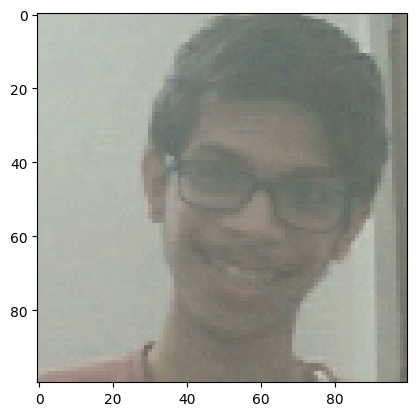

In [33]:
plt.imshow(res[1])

In [34]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=10000)

In [35]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [36]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [37]:
inp = Input(shape=(100,100,3), name='input_image')

In [38]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [39]:
m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

In [40]:
c2 = Conv2D(128, (7,7), activation='relu')(m1)
m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

In [41]:
c3 = Conv2D(128, (4,4), activation='relu')(m2)
m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

In [42]:
c4 = Conv2D(256, (4,4), activation='relu')(m3)
f1 = Flatten()(c4)
d1 = Dense(4096, activation='sigmoid')(f1)

In [43]:
mod = Model(inputs=[inp], outputs=[d1], name='embedding')

In [44]:
mod.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 128)       26

In [45]:
def make_embedding():
    inp = Input(shape=(100,100,3), name='input_image')

    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)

    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)

    # Third block
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)

    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)


    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [46]:
embedding = make_embedding()

In [47]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 91, 91, 64)        19264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 40, 40, 128)       401536    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 128)       26

In [155]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)


In [156]:
l1 = L1Dist()

In [157]:
l1(anchor_embedding, validation_embedding)

NameError: name 'anchor_embedding' is not defined

In [51]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [52]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [53]:
siamese_layer = L1Dist()

In [54]:
distances = siamese_layer(inp_embedding, val_embedding)

In [55]:
classifier = Dense(1, activation='sigmoid')(distances)

In [56]:
classifier

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_2')>

In [57]:
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [58]:
siamese_network.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [59]:
def make_siamese_model():

    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))

    # Validation image in the network
    validation_image = Input(name='validation_img', shape=(100,100,3))

    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))

    # Classification layer
    classifier = Dense(1, activation='sigmoid')(distances)

    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [61]:
siamese_model = make_siamese_model()

In [62]:
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [63]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [64]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [65]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [133]:
test_batch = train_data.as_numpy_iterator()

In [134]:
batch_1 = test_batch.next()

In [135]:
X = batch_1[:2]

In [136]:
y = batch_1[2]

In [137]:
y

array([0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
      dtype=float32)

In [138]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [139]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [140]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 [==============================] - 9s 9s/step


In [141]:
# Post processing the results
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [142]:
y_true

array([1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

In [143]:
# Creating a metric object
m = Recall()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [144]:
# Creating a metric object
m = Precision()

# Calculating the recall value
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

1.0

In [145]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat)

print(r.result().numpy(), p.result().numpy())

1/1 [==============================] - 2s 2s/step
1.0 1.0


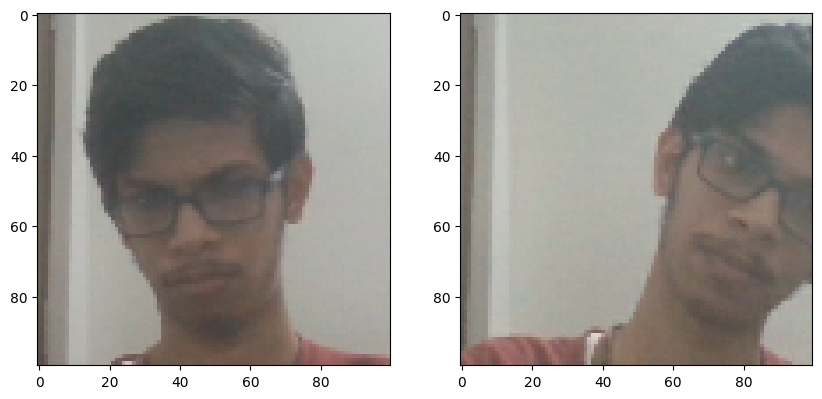

In [146]:
# Set plot size
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

In [147]:
L1Dist

__main__.L1Dist

In [109]:
# Reload model
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5',
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [148]:
# Make predictions with reloaded model
siamese_model.predict([test_input, test_val])

1/1 [==============================] - 2s 2s/step


array([[1.0000000e+00],
       [1.8391722e-08],
       [9.8329804e-07]], dtype=float32)

In [149]:
# View model summary
siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_img (InputLayer)      [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 validation_img (InputLayer  [(None, 100, 100, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 embedding (Functional)      (None, 4096)                 3896044   ['input_img[0][0]',           
                                                          8          'validation_img[0][0]']      
                                                                                     

In [112]:
application_data\verification_images

SyntaxError: unexpected character after line continuation character (2818603333.py, line 1)

In [150]:
os.path.join('application_data', 'input_image', 'input_image.jpg')

'application_data\\input_image\\input_image.jpg'

In [152]:
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)

application_data\verification_images\be3a2222-4f42-11ef-a2d4-fa294785e937 - Copy - Copy.jpg
application_data\verification_images\be488193-4f42-11ef-9ff1-fa294785e937 - Copy - Copy.jpg
application_data\verification_images\be64f989-4f42-11ef-8fce-fa294785e937 - Copy - Copy.jpg
application_data\verification_images\be972cdf-4f42-11ef-9129-fa294785e937 - Copy - Copy.jpg
application_data\verification_images\beb87a3c-4f42-11ef-b6c8-fa294785e937 - Copy - Copy.jpg
application_data\verification_images\bec6d0c0-4f42-11ef-876d-fa294785e937 - Copy - Copy.jpg
application_data\verification_images\bee1552b-4f42-11ef-84c3-fa294785e937 - Copy - Copy.jpg
application_data\verification_images\c00941e8-4f42-11ef-8edb-fa294785e937 - Copy.jpg
application_data\verification_images\c03d6a68-4f42-11ef-956c-fa294785e937 - Copy - Copy.jpg
application_data\verification_images\c0615c92-4f42-11ef-9444-fa294785e937 - Copy.jpg
application_data\verification_images\c06f6442-4f42-11ef-ba07-fa294785e937 - Copy - Copy.jpg
ap

In [153]:
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))

        # Make Predictions
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)

    # Detection Threshold: Metric above which a prediciton is considered positive
    detection = np.sum(np.array(results) > detection_threshold)

    # Verification Threshold: Proportion of positive predictions / total positive samples
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images')))
    verified = verification > verification_threshold

    return results, verified

In [154]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]

    cv2.imshow('Verification', frame)

    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10

#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.8, 0.7)
        print(verified)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 2s 2s/step
True


In [116]:
np.sum(np.squeeze(results) > 0.9)

45

In [117]:
results

[array([[0.9995227]], dtype=float32),
 array([[0.9999953]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.9999536]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.99999845]], dtype=float32),
 array([[0.99778616]], dtype=float32),
 array([[0.99995685]], dtype=float32),
 array([[0.99999464]], dtype=float32),
 array([[0.9999981]], dtype=float32),
 array([[0.9998909]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[0.9999998]], dtype=float32),
 array([[0.9999983]], dtype=float32),
 array([[0.9999973]], dtype=float32),
 array([[0.99105364]], dtype=float32),
 array([[0.95644087]], dtype=float32),
 array([[0.99995506]], dtype=float32),
 array([[0.9999994]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]]